A company recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, ….com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.

The A/B test has run for 1 month and ….com now expects you to analyze and present the results of this A/B test.

dataset: [link](https://drive.google.com/file/d/1wWrEtnuDidBuWaLlVJUd-zea9QZ4DxFT/view?usp=sharing)

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import io

**DATA CONTROL**

In [ ]:
df_control = pd.read_csv('control_group.csv', delimiter=";")
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,83942,53493,4032,984,843,782,432


In [ ]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [ ]:
#change datatypes
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
df_control.iloc[:,2:10] = df_control.iloc[:,2:10].apply(pd.to_numeric)
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [ ]:
df_control.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,108705.833333,87666.533333,5277.833333,2180.066667,1907.100000,1282.733333,519.766667
std,367.334451,21818.891260,22402.541483,1742.761425,880.497662,790.013284,411.389398,182.564619
min,1757.000000,71274.000000,42859.000000,2277.000000,984.000000,843.000000,442.000000,222.000000
25%,1945.500000,91211.500000,69708.500000,4045.250000,1451.500000,1174.000000,913.500000,375.500000
50%,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [ ]:
df_control.corr()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
Spend [USD],1.000000,0.307041,0.249285,-0.059138,0.043462,-0.000076,-0.007650,0.062805
# of Impressions,0.307041,1.000000,0.960502,-0.081568,-0.170680,-0.189116,0.022717,0.004579
Reach,0.249285,0.960502,1.000000,-0.017278,-0.109515,-0.122817,0.018623,0.022224
# of Website Clicks,-0.059138,-0.081568,-0.017278,1.000000,0.541650,0.581805,0.124690,-0.253019
# of Searches,0.043462,-0.170680,-0.109515,0.541650,1.000000,0.989930,0.114440,-0.066749
# of View Content,-0.000076,-0.189116,-0.122817,0.581805,0.989930,1.000000,0.107968,-0.092302
# of Add to Cart,-0.007650,0.022717,0.018623,0.124690,0.114440,0.107968,1.000000,0.106693
# of Purchase,0.062805,0.004579,0.022224,-0.253019,-0.066749,-0.092302,0.106693,1.000000


**DATA TEST**

In [ ]:
df_test = pd.read_csv('test_group.csv', delimiter=";")
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [ ]:
#change datatypes
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
df_test.iloc[:,2:10] = df_test.iloc[:,2:10].apply(pd.to_numeric)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign Name        30 non-null     object        
 1   Date                 30 non-null     datetime64[ns]
 2   Spend [USD]          30 non-null     int64         
 3   # of Impressions     30 non-null     int64         
 4   Reach                30 non-null     int64         
 5   # of Website Clicks  30 non-null     int64         
 6   # of Searches        30 non-null     int64         
 7   # of View Content    30 non-null     int64         
 8   # of Add to Cart     30 non-null     int64         
 9   # of Purchase        30 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.5+ KB


In [ ]:
df_test.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [ ]:
#Combine two datasets into one and add new features for metrics evaluation
df = pd.concat([df_test,df_control])
df = df.reset_index()
df['USD Spend per Purchase'] = round(df['Spend [USD]']/df['# of Purchase'],2)
df['CTR(%)'] = round(df['# of Website Clicks']*100/df['# of Impressions'],2)
df['Conversion Rate(%)'] = round(df['# of Purchase']*100/df['# of Website Clicks'],2)

In [ ]:
df.head()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
0,0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,11.80,7.68,8.39
1,1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,3.75,4.62,14.54
2,2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,4.09,11.22,7.33
3,3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,7.97,5.37,8.06
4,4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,2.99,5.13,13.10


In [ ]:
df.tail()

,index,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
55,25,Control Campaign,2019-08-26,2233,124897,98432,5435,2847,2421,1448,251,8.90,4.35,4.62
56,26,Control Campaign,2019-08-27,2061,104678,91579,4941,3549,3249,980,605,3.41,4.72,12.24
57,27,Control Campaign,2019-08-28,2421,141654,125874,6287,1672,1589,1711,643,3.77,4.44,10.23
58,28,Control Campaign,2019-08-29,2375,92029,74192,8127,4891,4219,1486,334,7.11,8.83,4.11
59,29,Control Campaign,2019-08-30,2324,111306,88632,4658,1615,1249,442,670,3.47,4.18,14.38


In [ ]:
df.describe()

,index,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,USD Spend per Purchase,CTR(%),Conversion Rate(%)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,14.500000,2425.750000,91645.316667,70579.050000,5655.083333,2299.516667,1882.550000,1082.133333,520.500000,5.463000,7.663667,10.341333
std,8.728484,381.130461,32204.651188,30841.302819,1752.843784,685.461653,694.948027,428.360037,195.642834,2.487615,5.593994,5.760894
min,0.000000,1757.000000,22521.000000,10598.000000,2277.000000,984.000000,843.000000,278.000000,222.000000,2.250000,1.860000,3.010000
25%,7.000000,2073.750000,69558.250000,43235.500000,4219.750000,1939.500000,1246.750000,811.250000,340.000000,3.507500,4.315000,6.345000
50%,14.500000,2420.500000,95448.500000,75205.500000,5581.000000,2374.500000,1934.500000,1067.000000,500.000000,4.705000,6.075000,8.830000
75%,22.000000,2727.500000,117160.500000,95314.250000,7201.250000,2755.750000,2422.500000,1384.250000,685.000000,7.490000,8.435000,13.025000
max,29.000000,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000,12.700000,33.820000,32.240000


In [ ]:
total_spend = df.groupby(['Campaign Name'])['Spend [USD]'].sum().reset_index()
total_spend

,Campaign Name,Spend [USD]
0,Control Campaign,68653
1,Test Campaign,76892


In [ ]:
total_web_click = df.groupby(['Campaign Name'])['# of Website Clicks'].sum().reset_index()
total_web_click

,Campaign Name,# of Website Clicks
0,Control Campaign,158335
1,Test Campaign,180970


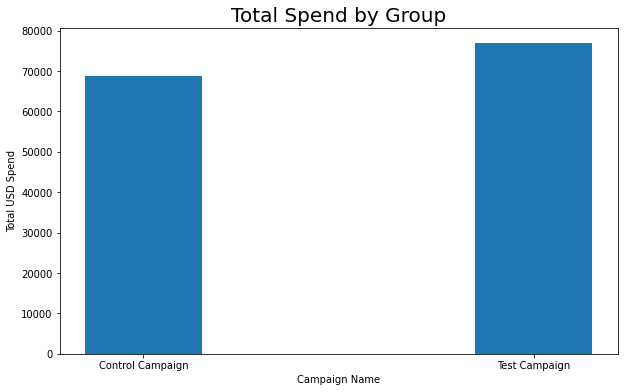

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.bar(total_spend['Campaign Name'], total_spend['Spend [USD]'], width = 0.3)
plt.xlabel("Campaign Name")
plt.ylabel("Total USD Spend")
plt.title("Total Spend by Group", fontdict = {'fontsize' : 20})
plt.show()

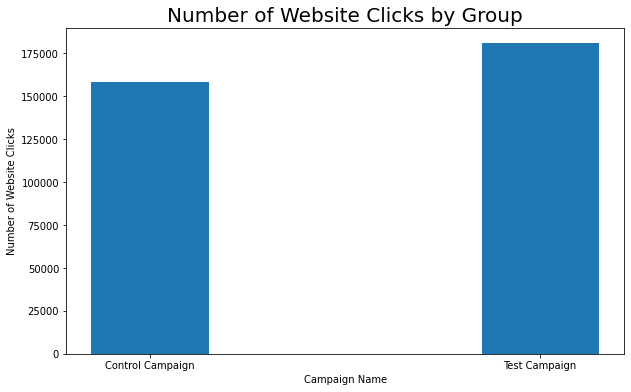

In [ ]:
fig = plt.figure(figsize = (10, 6))
plt.bar(total_web_click['Campaign Name'], total_web_click['# of Website Clicks'], width = 0.3)
plt.xlabel("Campaign Name")
plt.ylabel("Number of Website Clicks")
plt.title("Number of Website Clicks by Group", fontdict = {'fontsize' : 20})
plt.show()

In [ ]:
spend_per_purchase = df.groupby(['Campaign Name'])['USD Spend per Purchase'].mean().reset_index()
spend_per_purchase

,Campaign Name,USD Spend per Purchase
0,Control Campaign,5.026
1,Test Campaign,5.900


In [ ]:
spend_per_purchase_uplift = (5.900000-4.986333)/4.986333
spend_per_purchase_uplift

0.1832342525057994

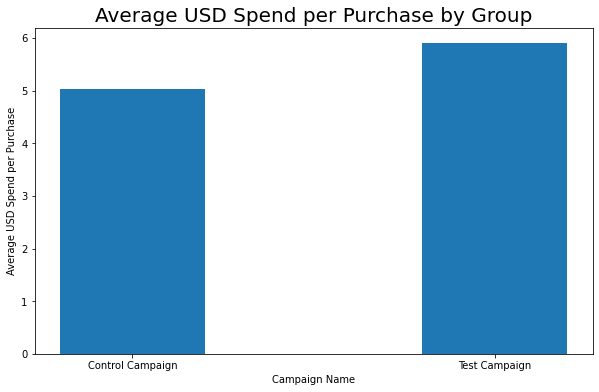

In [ ]:
fig = plt.figure(figsize = (10,6))
plt.bar(spend_per_purchase['Campaign Name'], spend_per_purchase['USD Spend per Purchase'], width = 0.4)
plt.xlabel("Campaign Name")
plt.ylabel("Average USD Spend per Purchase")
plt.title("Average USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

In [ ]:
num_of_purchase = df.groupby(['Campaign Name'])['# of Purchase'].sum().reset_index()
num_of_purchase

,Campaign Name,# of Purchase
0,Control Campaign,15593
1,Test Campaign,15637


**A/B Test**

In [ ]:
df_2 = df.copy()
df_2 = df_2.drop(['index','Date'], axis=1)
df_2['Campaign Name'] = pd.get_dummies(df_2['Campaign Name'], drop_first=True)
df_2 = df_2.reset_index(drop=True)
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]

In [ ]:
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']
test_group.describe()

count    30.000000
mean      9.230667
std       4.449266
min       3.010000
25%       6.570000
50%       8.450000
75%      11.667500
max      21.090000
Name: Conversion Rate(%), dtype: float64

In [ ]:
test_group

0      8.39
1     14.54
2      7.33
3      8.06
4     13.10
5      6.52
6     21.09
7      6.00
8     10.23
9      3.38
10    17.81
11     8.58
12    10.73
13     8.51
14     7.97
15     7.16
16     3.01
17     3.72
18     6.72
19    12.07
20     4.48
21     6.23
22     9.32
23     3.76
24    18.10
25     7.43
26    11.98
27     8.85
28     8.85
29    13.00
Name: Conversion Rate(%), dtype: float64

In [ ]:
control_group

30     8.81
31     6.30
32     5.72
33    11.09
34    10.71
35    18.97
36    18.90
37     6.36
38     8.08
39    32.24
40     5.84
41    26.53
42    11.69
43    17.43
44     7.48
45     8.38
46     3.35
47     3.35
48    14.62
49    11.60
50    14.06
51     5.66
52    17.37
53    14.32
54     9.12
55     4.62
56    12.24
57    10.23
58     4.11
59    14.38
Name: Conversion Rate(%), dtype: float64

In [ ]:
control_group.describe()

count    30.000000
mean     11.452000
std       6.721012
min       3.350000
25%       6.315000
50%      10.470000
75%      14.365000
max      32.240000
Name: Conversion Rate(%), dtype: float64

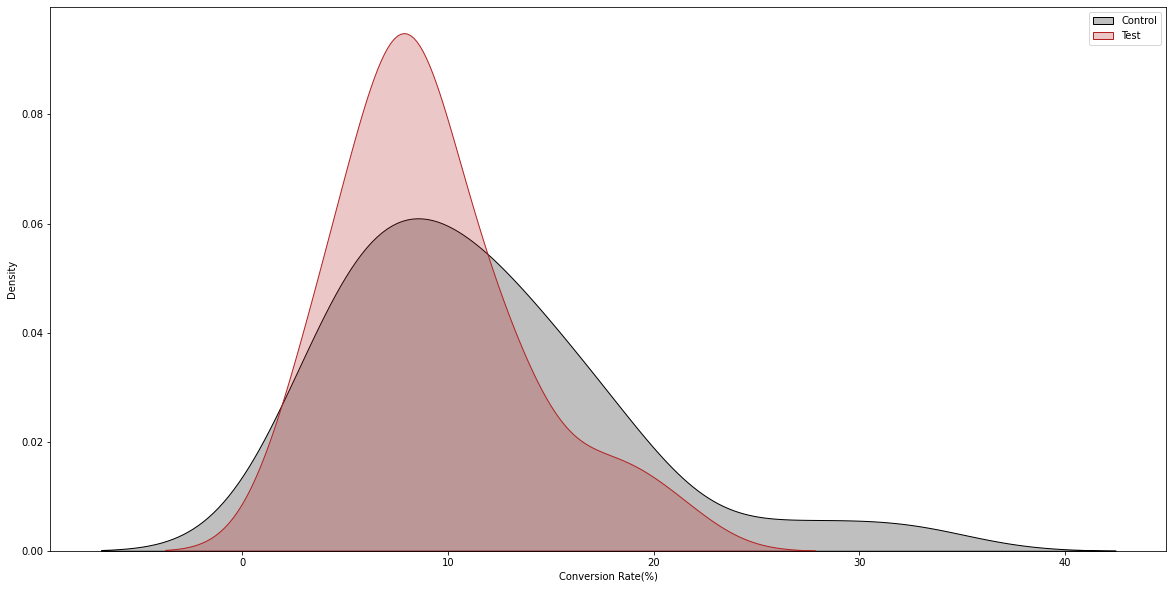

In [ ]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()

The data is not normally distributed. The long tail implies that outliers exist. Let's detect and remove the outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


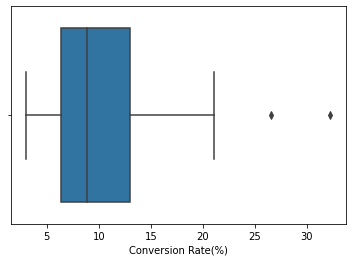

In [ ]:
sns.boxplot(df['Conversion Rate(%)'])

in the boxplot, we can see the values above 25 are acting as the outliers.

In [ ]:
#remove the outliers
df_2 = df_2[df_2['Conversion Rate(%)']<25]
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']

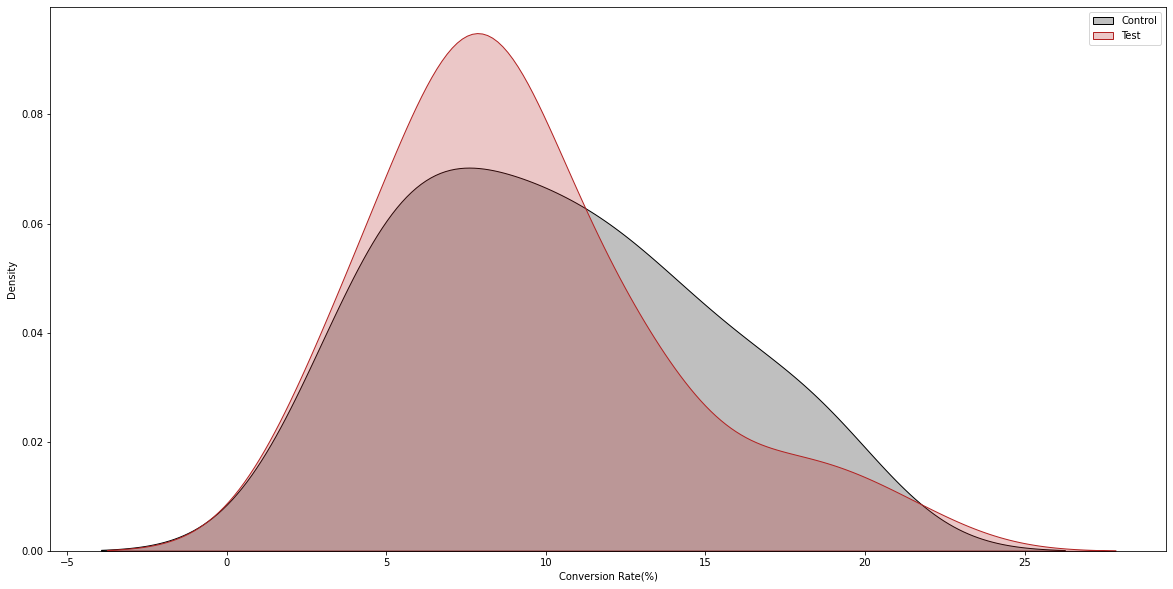

In [ ]:
#now plot the data distribution again
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()


In [ ]:
## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test = stats.ttest_ind(test_group,control_group, equal_var = True)

print(test)

Ttest_indResult(statistic=-0.7800877161133795, pvalue=0.4386240627629677)


Conclusion: p value > 0.05, Null Hypothesis is accepted. The new bidding type is not bringing higher conversion rate.